# O que são séries temporais?

In [ ]:
url = 'https://github.com/allanspadini/palestras/raw/main/dados/Salary_Data.csv'

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Tendência

In [ ]:
import seaborn as sns

<Axes: xlabel='YearsExperience', ylabel='Salary'>

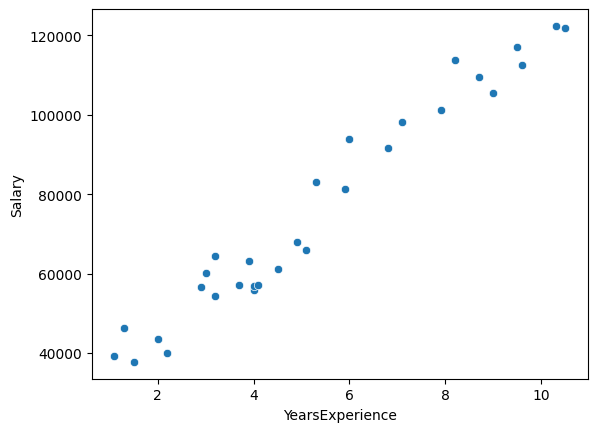

In [ ]:
sns.scatterplot(x='YearsExperience',y='Salary',data=df) #regplot

- Ruído

## Sazonalidade

In [ ]:
url = 'https://raw.githubusercontent.com/allanspadini/palestras/main/dados/co2.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


<Axes: xlabel='decimal date', ylabel='average'>

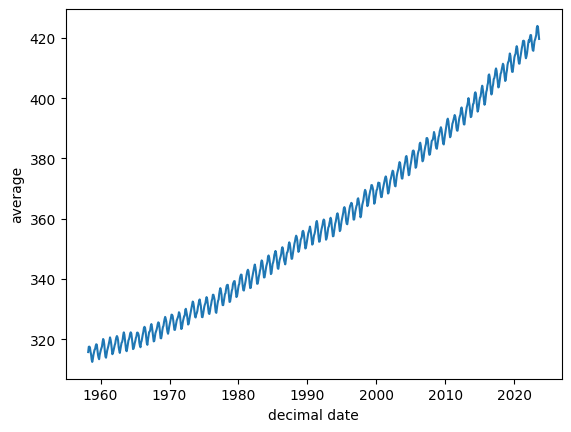

In [ ]:
sns.lineplot(x='decimal date',y='average',data=df)

<Axes: xlabel='decimal date', ylabel='average'>

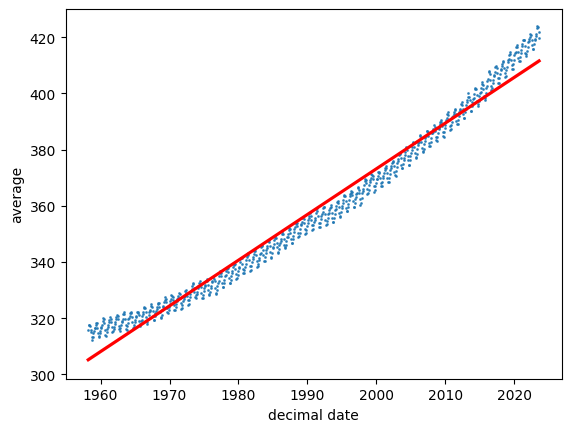

In [ ]:
sns.regplot(x='decimal date',y='average',data=df,scatter_kws={'s': 1},line_kws={'color': 'red'})

In [ ]:
df_2001 = df[df['year']==2001]
df_2002 = df[df['year']==2002]

<Axes: xlabel='decimal date', ylabel='average'>

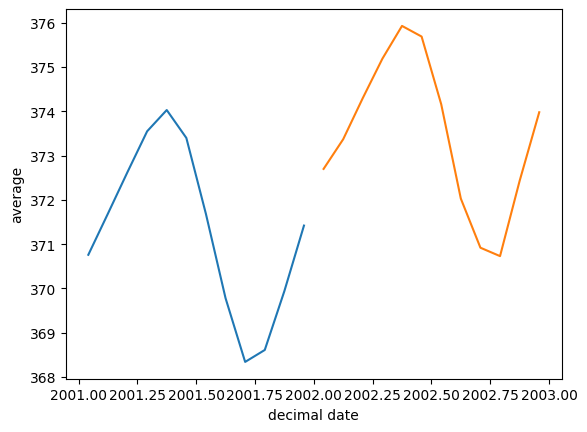

In [ ]:
sns.lineplot(x='decimal date',y='average',data=df_2001)
sns.lineplot(x='decimal date',y='average',data=df_2002)

## Fatores externos

In [ ]:
url = 'https://raw.githubusercontent.com/allanspadini/palestras/main/dados/selic.csv'

In [ ]:
df = pd.read_csv(url,sep=';')

In [ ]:
df.head()

,data,valor
0,04/06/1986,0.065041
1,05/06/1986,0.067397
2,06/06/1986,0.066740
3,09/06/1986,0.068247
4,10/06/1986,0.067041


In [ ]:
df['data'] = pd.to_datetime(df['data'],dayfirst=True)

<Axes: xlabel='data', ylabel='valor'>

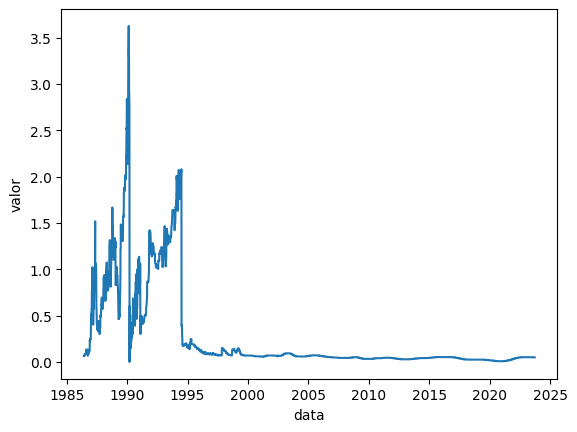

In [ ]:
sns.lineplot(x='data',y='valor',data=df)

In [ ]:
df_antes = df[df['data'].dt.year<1994]

<Axes: xlabel='data', ylabel='valor'>

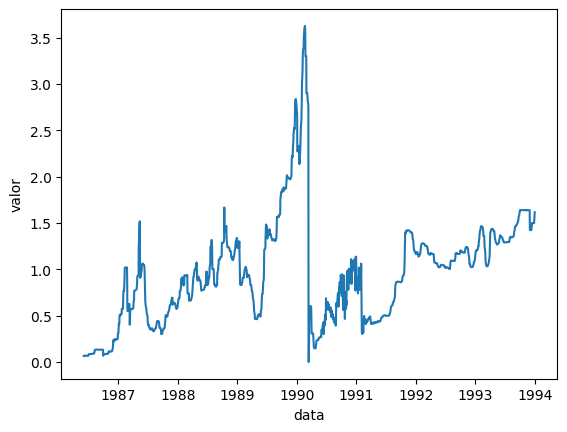

In [ ]:
sns.lineplot(x='data',y='valor',data=df_antes)

## Previsão

In [ ]:
url = 'https://raw.githubusercontent.com/allanspadini/palestras/main/dados/beer.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
...,...,...
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0


In [ ]:
df['Month'] = pd.to_datetime(df['Month'])

In [ ]:
df['Month']

0     1956-01-01
1     1956-02-01
2     1956-03-01
3     1956-04-01
4     1956-05-01
         ...    
471   1995-04-01
472   1995-05-01
473   1995-06-01
474   1995-07-01
475   1995-08-01
Name: Month, Length: 476, dtype: datetime64[ns]

In [ ]:
df_treino = df[:464]
df_teste = df[464:]

In [ ]:
df_teste.shape

(12, 2)

<Axes: xlabel='Month', ylabel='Monthly beer production'>

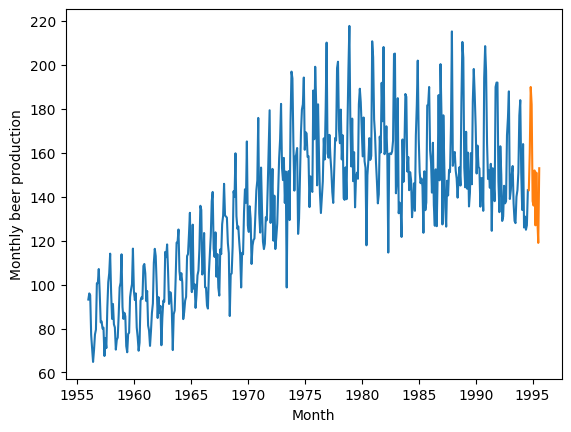

In [ ]:
sns.lineplot(x='Month',y='Monthly beer production',data=df_treino)
sns.lineplot(x='Month',y='Monthly beer production',data=df_teste)

In [ ]:
df_treino.rename(columns={'Month': 'ds', 'Monthly beer production': 'y'}, inplace=True);
df_teste.rename(columns={'Month': 'ds', 'Monthly beer production': 'y'}, inplace=True);

<ipython-input-250-b6c8739ddc70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treino.rename(columns={'Month': 'ds', 'Monthly beer production': 'y'}, inplace=True);
<ipython-input-250-b6c8739ddc70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste.rename(columns={'Month': 'ds', 'Monthly beer production': 'y'}, inplace=True);


In [ ]:
df_treino

,ds,y
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9
...,...,...
459,1994-04-01,126.0
460,1994-05-01,131.0
461,1994-06-01,125.0
462,1994-07-01,127.0


In [ ]:
from prophet import Prophet

In [ ]:
modelo = Prophet()

In [ ]:
modelo.fit(df_treino);

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpapvnba2o/o9b74566.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpapvnba2o/0rsh4ao4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34003', 'data', 'file=/tmp/tmpapvnba2o/o9b74566.json', 'init=/tmp/tmpapvnba2o/0rsh4ao4.json', 'output', 'file=/tmp/tmpapvnba2o/prophet_modelnedk30hb/prophet_model-20230921145921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:59:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:59:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
df_teste.shape

(12, 2)

In [ ]:
futuro = modelo.make_future_dataframe(periods=12,freq='M')

In [ ]:
previsao = modelo.predict(futuro)

In [ ]:
previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1956-01-01,81.760378,73.034507,97.457881,81.760378,81.760378,3.061049,3.061049,3.061049,3.061049,3.061049,3.061049,0.0,0.0,0.0,84.821427
1,1956-02-01,81.945246,65.896456,91.188814,81.945246,81.945246,-4.004033,-4.004033,-4.004033,-4.004033,-4.004033,-4.004033,0.0,0.0,0.0,77.941213
2,1956-03-01,82.118187,74.001108,100.698669,82.118187,82.118187,5.484227,5.484227,5.484227,5.484227,5.484227,5.484227,0.0,0.0,0.0,87.602414
3,1956-04-01,82.303055,62.707240,88.228254,82.303055,82.303055,-6.311544,-6.311544,-6.311544,-6.311544,-6.311544,-6.311544,0.0,0.0,0.0,75.991511
4,1956-05-01,82.481960,58.949913,83.999843,82.481960,82.481960,-11.242949,-11.242949,-11.242949,-11.242949,-11.242949,-11.242949,0.0,0.0,0.0,71.239011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,1995-03-31,151.027473,128.462682,153.949530,150.982725,151.081124,-10.250780,-10.250780,-10.250780,-10.250780,-10.250780,-10.250780,0.0,0.0,0.0,140.776692
472,1995-04-30,150.962672,125.730832,152.269834,150.898212,151.041117,-11.500822,-11.500822,-11.500822,-11.500822,-11.500822,-11.500822,0.0,0.0,0.0,139.461850
473,1995-05-31,150.895711,116.840825,141.956448,150.809249,151.001763,-22.030647,-22.030647,-22.030647,-22.030647,-22.030647,-22.030647,0.0,0.0,0.0,128.865064
474,1995-06-30,150.830910,121.735903,146.366484,150.727847,150.961996,-17.220714,-17.220714,-17.220714,-17.220714,-17.220714,-17.220714,0.0,0.0,0.0,133.610196


<Axes: xlabel='ds', ylabel='y'>

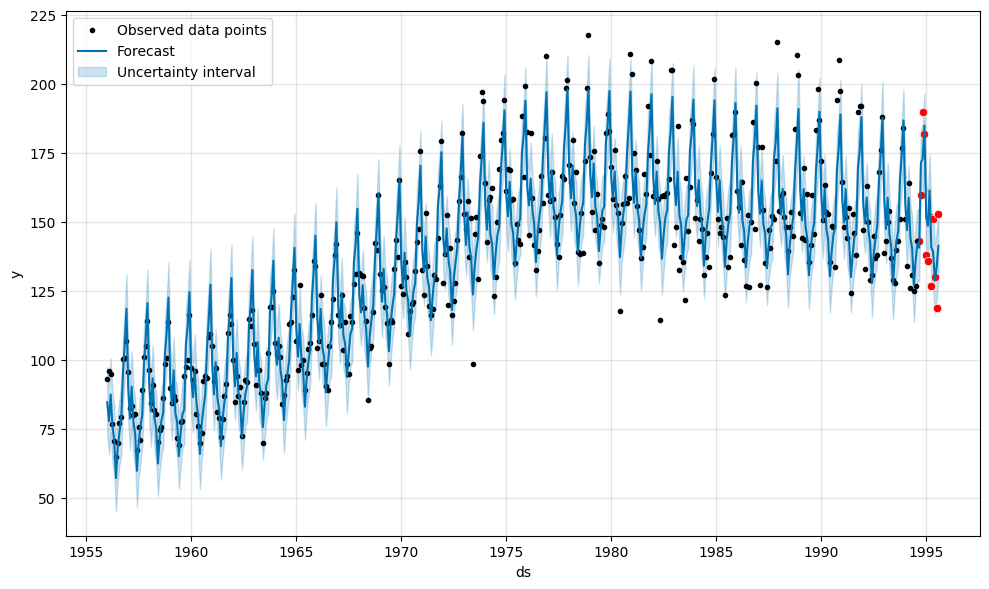

In [ ]:
fig = modelo.plot(previsao)
sns.scatterplot(x='ds',y='y',data=df_teste,color='r')

## Tendência

<Axes: xlabel='ds', ylabel='y'>

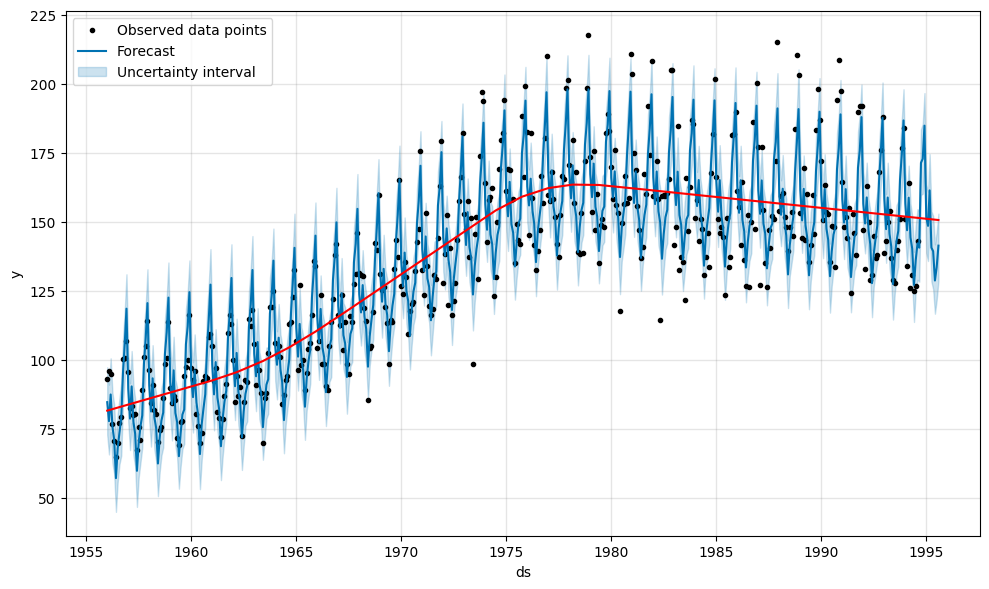

In [ ]:
fig = modelo.plot(previsao)
sns.lineplot(x='ds',y='trend',data=previsao,color='r')

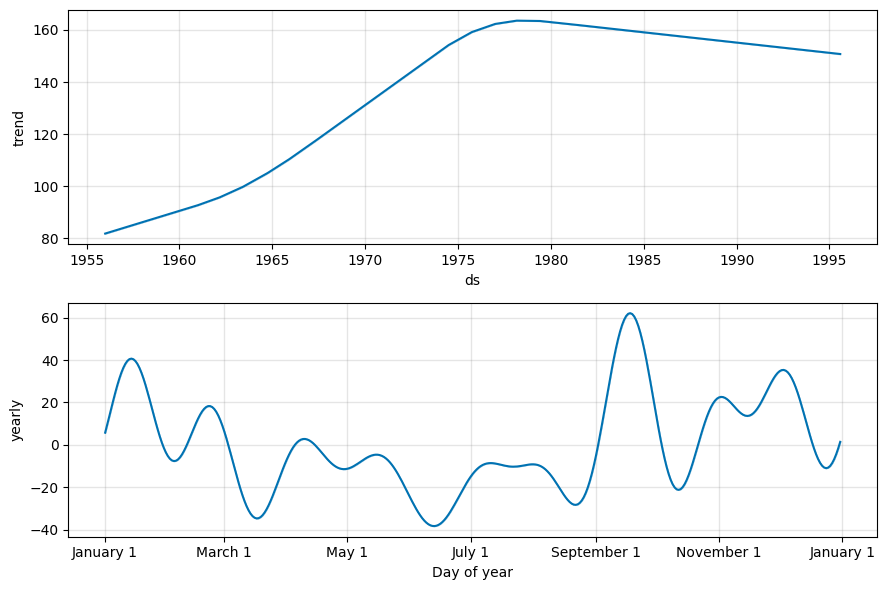

In [ ]:
fig = modelo.plot_components(previsao)

In [ ]:
valor_da_capacidade = 225

In [ ]:
df_treino['cap'] = valor_da_capacidade

<ipython-input-263-39cb6b372f20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treino['cap'] = valor_da_capacidade


In [ ]:
df_treino

,ds,y,cap
0,1956-01-01,93.2,225
1,1956-02-01,96.0,225
2,1956-03-01,95.2,225
3,1956-04-01,77.1,225
4,1956-05-01,70.9,225
...,...,...,...
459,1994-04-01,126.0,225
460,1994-05-01,131.0,225
461,1994-06-01,125.0,225
462,1994-07-01,127.0,225


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpapvnba2o/nx1c4x3r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpapvnba2o/k8vk0aoq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62405', 'data', 'file=/tmp/tmpapvnba2o/nx1c4x3r.json', 'init=/tmp/tmpapvnba2o/k8vk0aoq.json', 'output', 'file=/tmp/tmpapvnba2o/prophet_modelbfflo_mg/prophet_model-20230921150117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:01:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:01:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Axes: xlabel='ds', ylabel='y'>

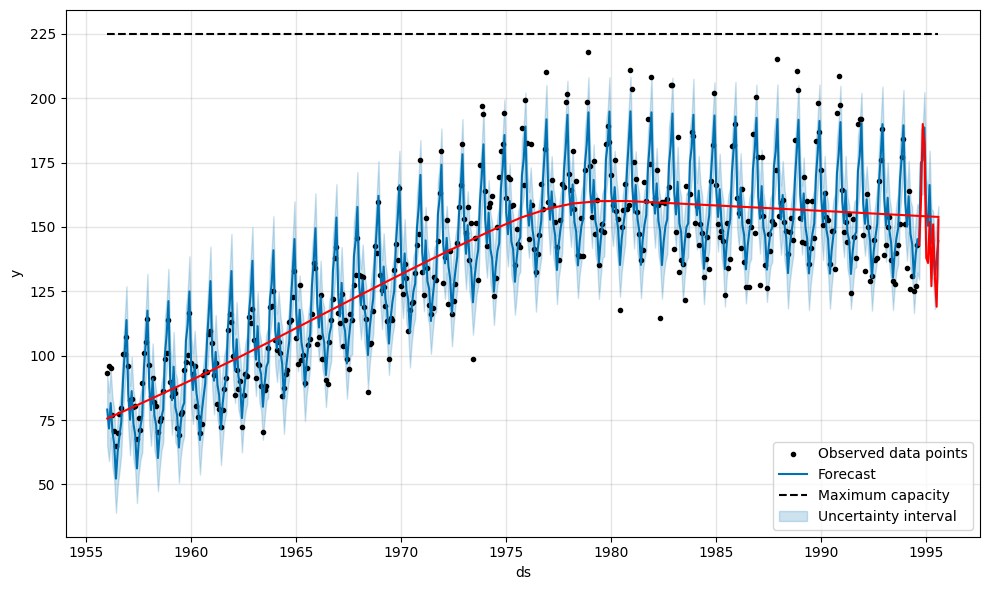

In [ ]:
modelo = Prophet(growth='logistic')
modelo.fit(df_treino);
futuro = modelo.make_future_dataframe(periods=12,freq='M')
futuro['cap'] = valor_da_capacidade
previsao = modelo.predict(futuro)
fig = modelo.plot(previsao)
sns.lineplot(x='ds',y='y',data=df_teste,color='r')
sns.lineplot(x='ds',y='trend',data=previsao,color='r')